# Временные ряды
## Домашнее задание №1

<pre>
ФИО: Никифоров Владимир
</pre>

#### Проанализируйте ряды, сделайте их стационарными.

In [1]:
def get_list_of_files(p_in_path = '../data', p_in_type = 'csv'):
    ''' Get list of files by specified type in specified directory '''
    import os, glob

    os.chdir(p_in_path)
    return glob.glob('*.{}'.format(p_in_type))

In [2]:
def check_series(p_in_file_name):
    ''' Check specified series '''
    
    import pandas as pd
    import numpy as np
    from statsmodels.tsa.stattools import adfuller
    import statsmodels.api as sm
    import statsmodels.tsa.api as smt
    from statsmodels.tsa.stattools import adfuller
    import matplotlib.pyplot as plt
    from scipy.stats import boxcox
    from pprint import pprint
    %matplotlib inline
    
    def test_stationarity(timeseries):
        print('Results of Dickey-Fuller Test:')
        dftest = adfuller(timeseries, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
        for [key, value] in dftest[4].items():
            dfoutput['Critical Value (%s)' % key] = value
        print(dfoutput)
        return dftest[1], dftest[2]
    
    def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
        p_val, lag = test_stationarity(y)
        if not isinstance(y, pd.Series):
            y = pd.Series(y)
        with plt.style.context(style):
            plt.figure(figsize=figsize)
            layout = (4, 1)
            ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
            acf_ax = plt.subplot2grid(layout, (2, 0))
            pacf_ax = plt.subplot2grid(layout, (3, 0))

            y.plot(ax=ts_ax, color='blue', label='Or')
            ts_ax.set_title('Original')

            smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
            smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

            plt.tight_layout()
            plt.show()
        return p_val, lag
    
    print(f'Filename: {p_in_file_name}\n\n')
    df = pd.read_csv(p_in_file_name).dropna()
    print('\nФайл содержит следующие данные:')
    pprint(df.head())
    print('\nФайл содержит следующие столбцы:')
    pprint(df.columns)
    series = df.iloc[:,1] #['Count']
    p_val, lag = tsplot(series)
    if p_val <= 0.05:
        print('Отлично! Тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда без каких-либо "приседаний"!\n')
    else:
        print('Как мы видим, тест Дики-Фуллера не отвергает гипотезу о нестационарности ряда. \nДля начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса\n')
        series = boxcox(series, 0)
        p_val, lag = tsplot(series)
        if p_val <= 0.05:
            print('Отлично! С помощью Бокса-Кокса удалось добиться, чтобы тест Дикки-Фуллера отвергал гипотезу о нестационарности ряда!\n')
        else:
            print('Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. \nПо графику ряда видно наличие сильного тренда. \nУберем его дифференцированием.\n')
            series = series[1:] - series[:-1]
            p_val, lag = tsplot(series)
            if p_val <= 0.05:
                print('Отлично! С помощью дифференцирования удалось добиться, чтобы тест Дикки-Фуллера отвергал гипотезу о нестационарности ряда!\n')
            else:
                print('Стало еще лучше, но по графику коррелограммы видно сильное влияние сезонности. \nУберем ее!\n')
                series = series[lag:] - series[:-lag]
                p_val, lag = tsplot(series)
                if p_val > 0.05:
                    print('Сделали все, что могли! :(\n')
                else:
                    print('Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!\n')
    print('='*150)

/home/truename/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


Filename: monthly-sales-of-company-x-jan-6.csv



Файл содержит следующие данные:
     Month  Count
0  1965-01    154
1  1965-02     96
2  1965-03     73
3  1965-04     49
4  1965-05     36

Файл содержит следующие столбцы:
Index(['Month', 'Count'], dtype='object')
Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


/home/truename/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


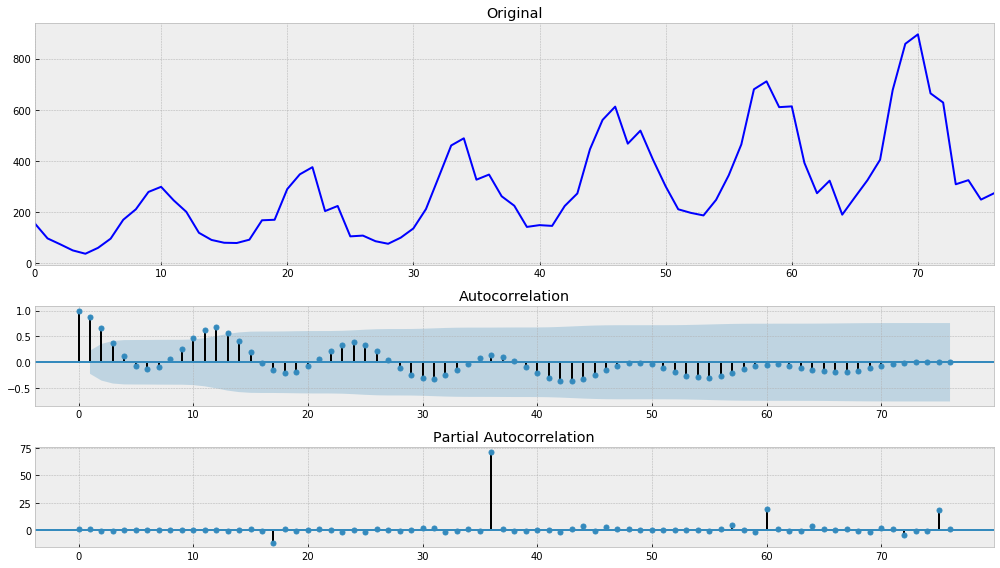

Как мы видим, тест Дики-Фуллера не отвергает гипотезу о нестационарности ряда. 
Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


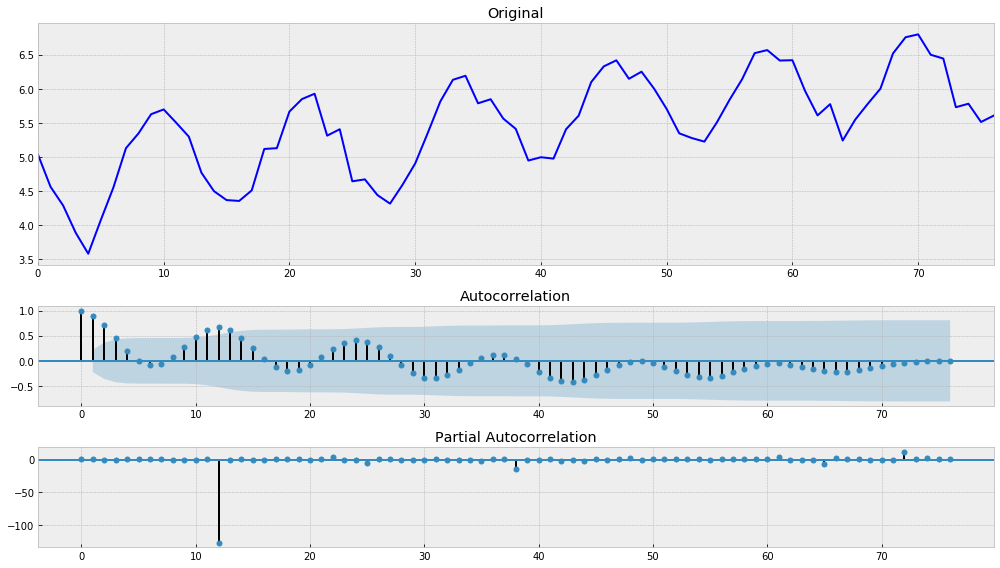

Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. 
По графику ряда видно наличие сильного тренда. 
Уберем его дифференцированием.

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


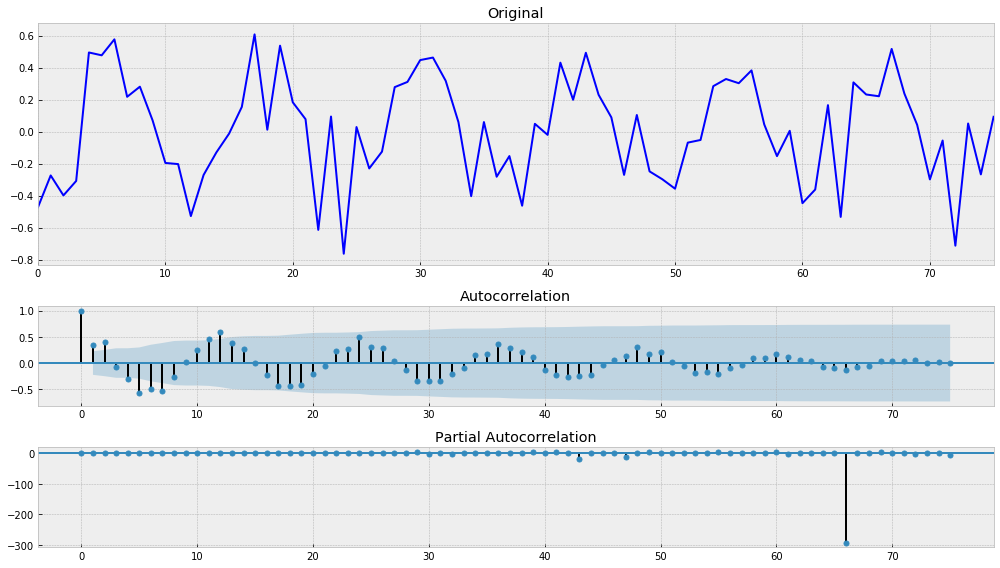

Отлично! С помощью дифференцирования удалось добиться, чтобы тест Дикки-Фуллера отвергал гипотезу о нестационарности ряда!

Filename: daily-total-female-births-in-cal.csv



Файл содержит следующие данные:
         Date  Count
0  1959-01-01     35
1  1959-01-02     32
2  1959-01-03     30
3  1959-01-04     31
4  1959-01-05     44

Файл содержит следующие столбцы:
Index(['Date', 'Count'], dtype='object')
Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


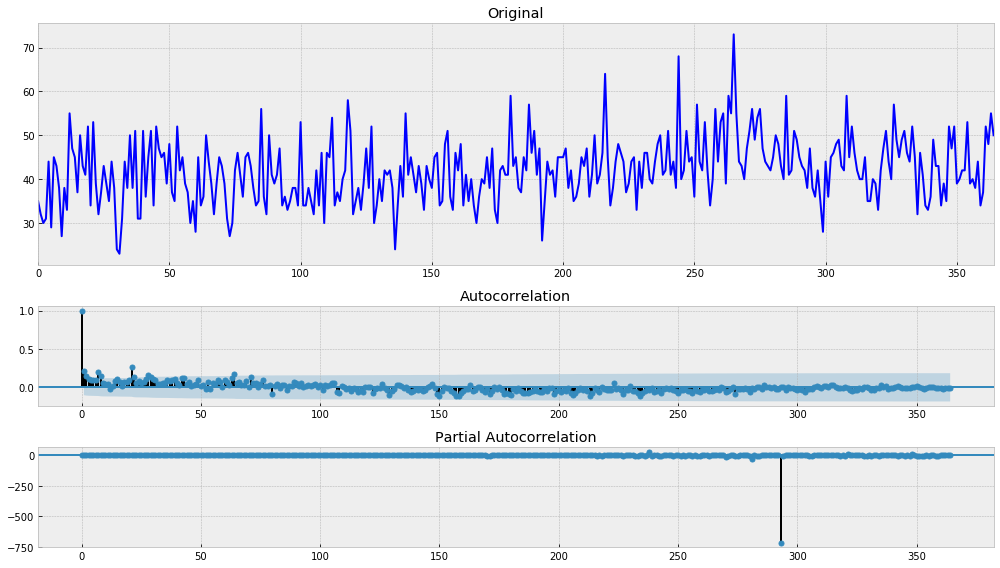

Отлично! Тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда без каких-либо "приседаний"!

Filename: mean-monthly-air-temperature-deg.csv



Файл содержит следующие данные:
     Month   Deg
0  1920-01  40.6
1  1920-02  40.8
2  1920-03  44.4
3  1920-04  46.7
4  1920-05  54.1

Файл содержит следующие столбцы:
Index(['Month', 'Deg'], dtype='object')
Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


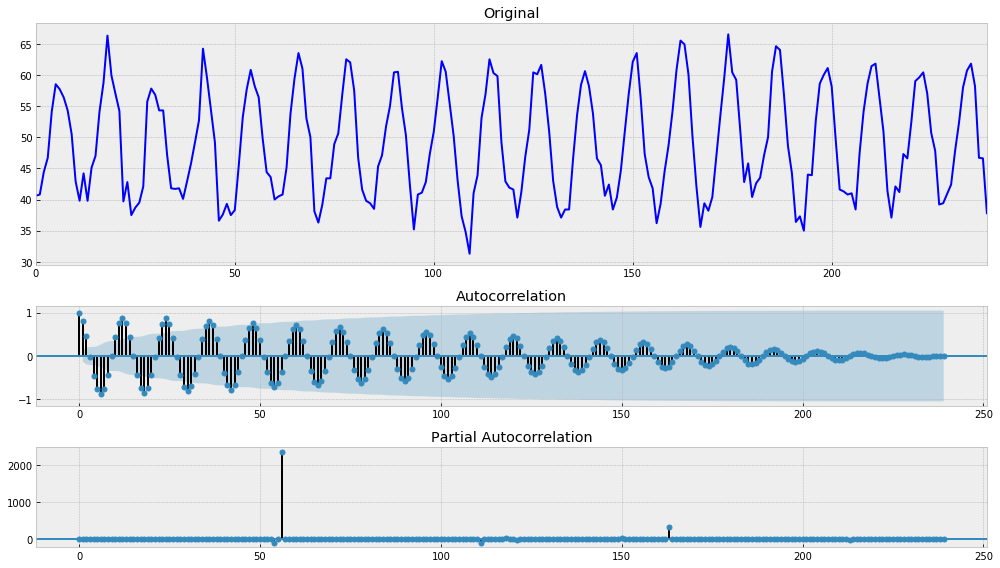

Отлично! Тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда без каких-либо "приседаний"!

Filename: international-airline-passengers2.csv



Файл содержит следующие данные:
     Month  \
0  1949-01   
1  1949-02   
2  1949-03   
3  1949-04   
4  1949-05   

   International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60  
0                                              112.0                               
1                                              118.0                               
2                                              132.0                               
3                                              129.0                               
4                                              121.0                               

Файл содержит следующие столбцы:
Index(['Month', 'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'], dtype='object')
Results of Dickey-Fuller Test:
Test Statistic           

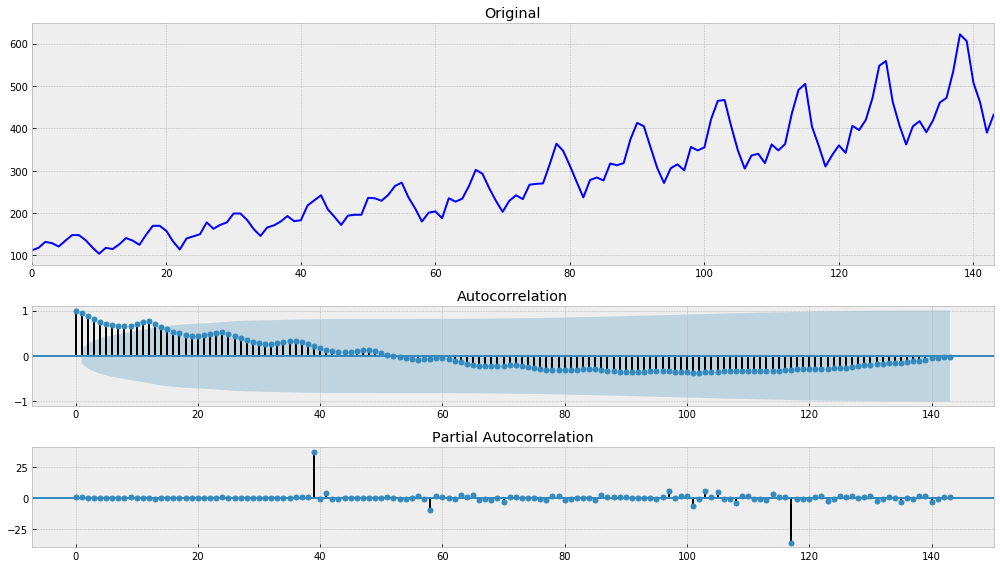

Как мы видим, тест Дики-Фуллера не отвергает гипотезу о нестационарности ряда. 
Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


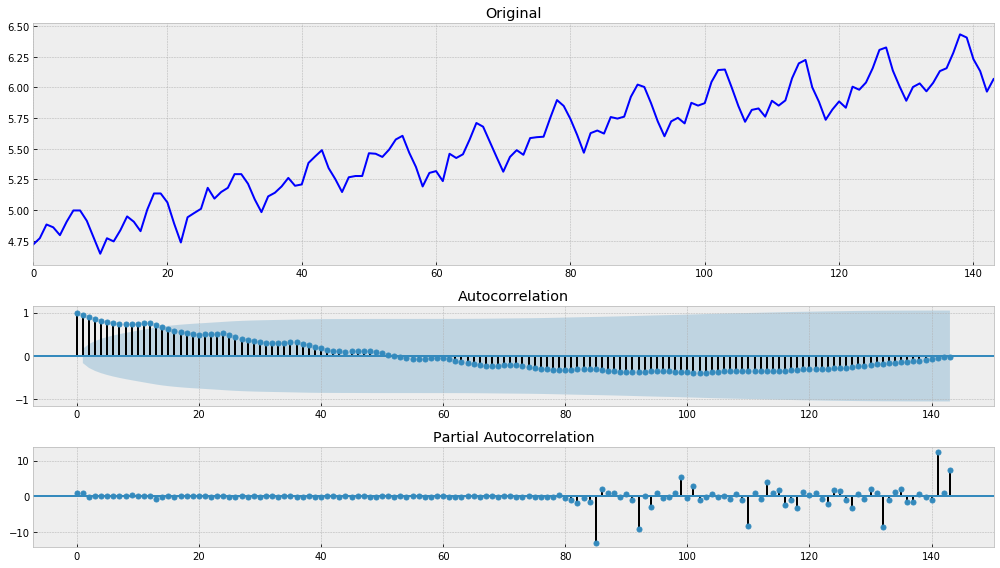

Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. 
По графику ряда видно наличие сильного тренда. 
Уберем его дифференцированием.

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


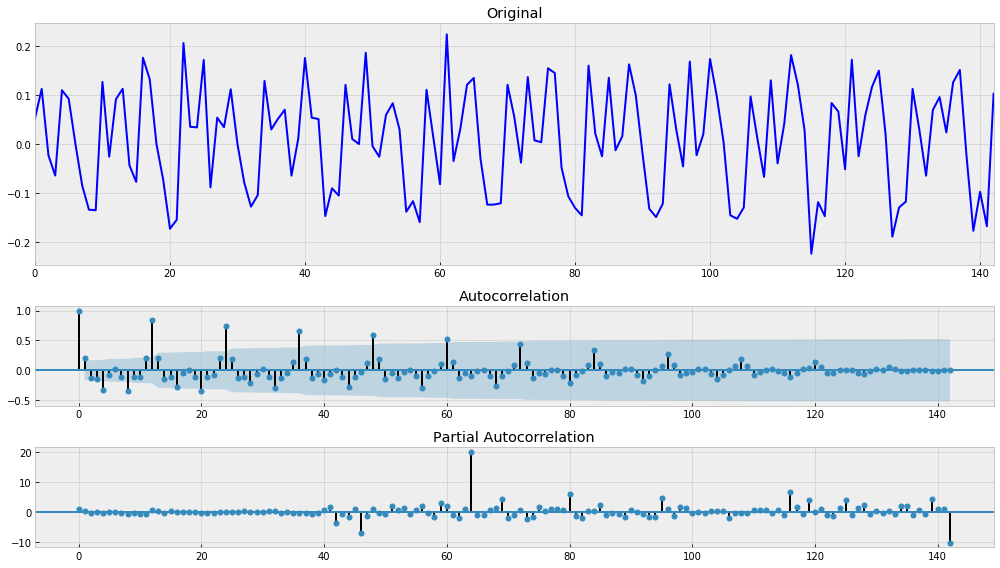

Стало еще лучше, но по графику коррелограммы видно сильное влияние сезонности. 
Уберем ее!

Results of Dickey-Fuller Test:
Test Statistic                  -3.730581
p-value                          0.003703
#Lags Used                      13.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%)            -2.580360
dtype: float64


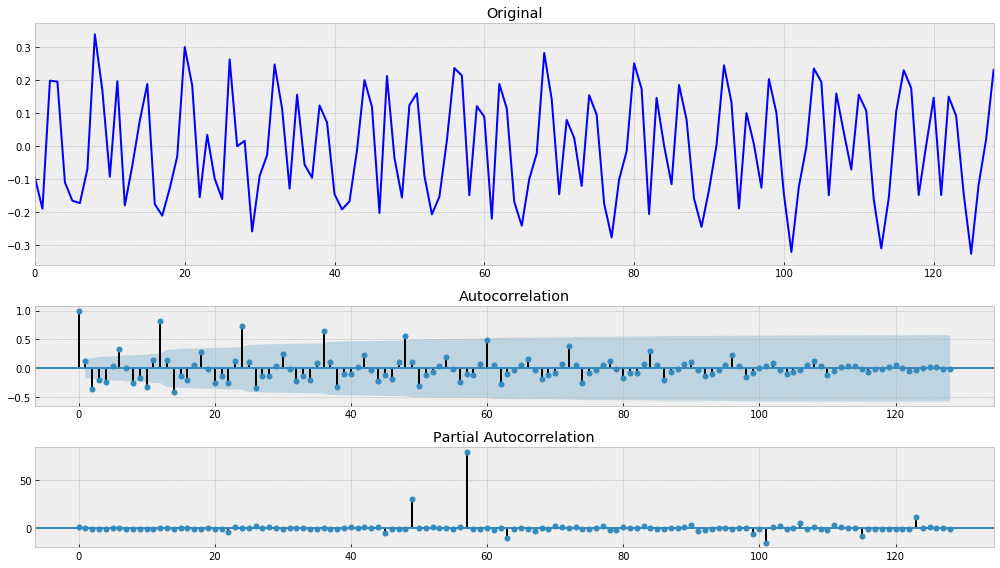

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

Filename: monthly-car-sales-in-quebec-1960.csv



Файл содержит следующие данные:
     Month  Count
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587

Файл содержит следующие столбцы:
Index(['Month', 'Count'], dtype='object')
Results of Dickey-Fuller Test:
Test Statistic                 -1.223813
p-value                         0.663269
#Lags Used                     12.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


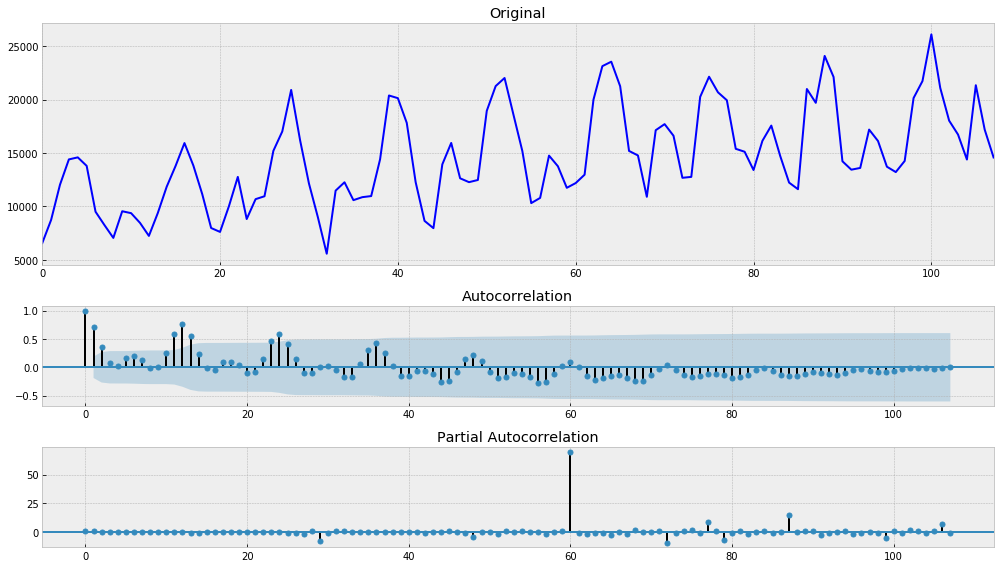

Как мы видим, тест Дики-Фуллера не отвергает гипотезу о нестационарности ряда. 
Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса

Results of Dickey-Fuller Test:
Test Statistic                 -1.452425
p-value                         0.556901
#Lags Used                     13.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


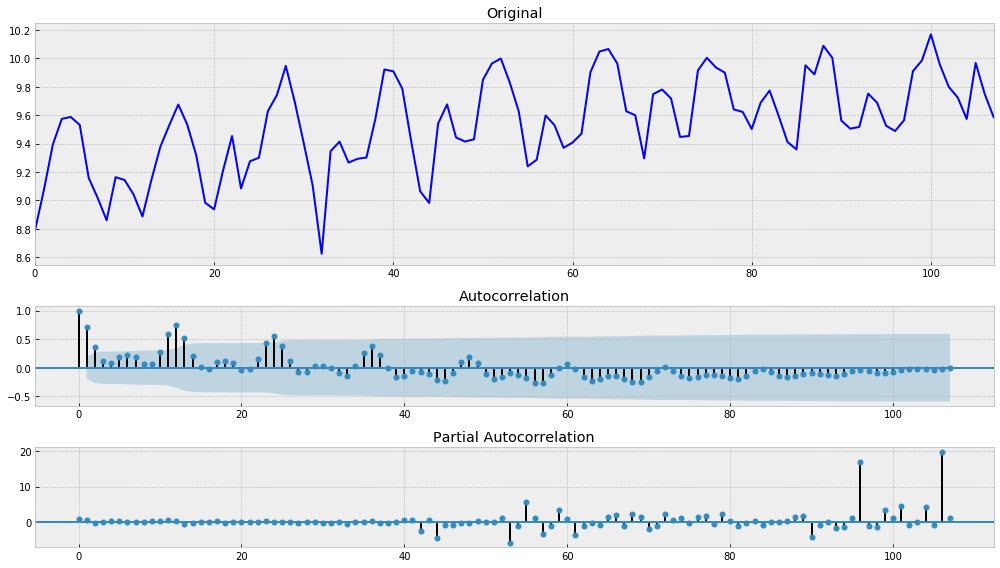

Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. 
По графику ряда видно наличие сильного тренда. 
Уберем его дифференцированием.

Results of Dickey-Fuller Test:
Test Statistic                 -4.193835
p-value                         0.000675
#Lags Used                     12.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


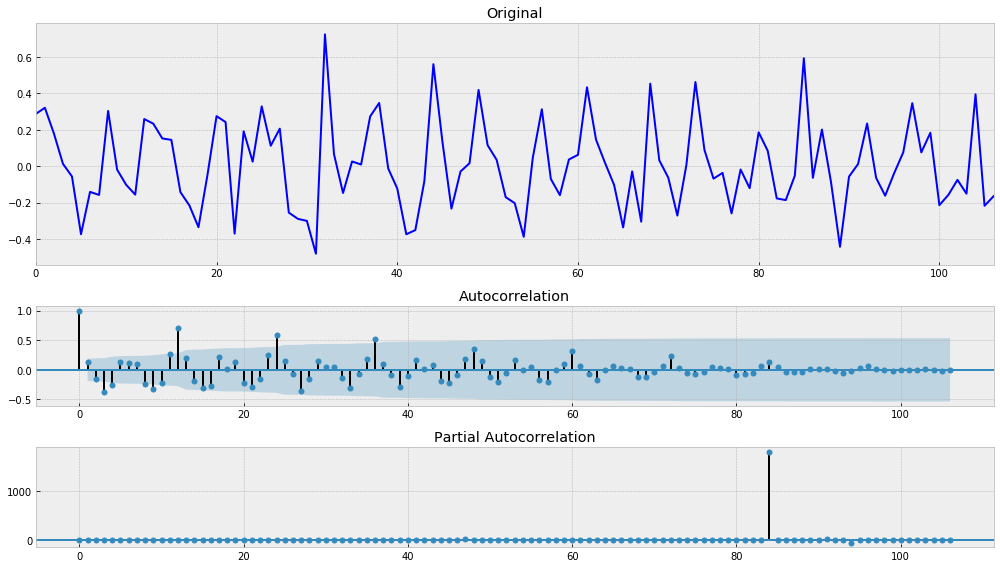

Отлично! С помощью дифференцирования удалось добиться, чтобы тест Дикки-Фуллера отвергал гипотезу о нестационарности ряда!

Filename: weekly-closings-of-the-dowjones-.csv



Файл содержит следующие данные:
       Week   Close
0  1971-W27  890.19
1  1971-W28  901.80
2  1971-W29  888.51
3  1971-W30  887.78
4  1971-W31  858.43

Файл содержит следующие столбцы:
Index(['Week', 'Close'], dtype='object')
Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


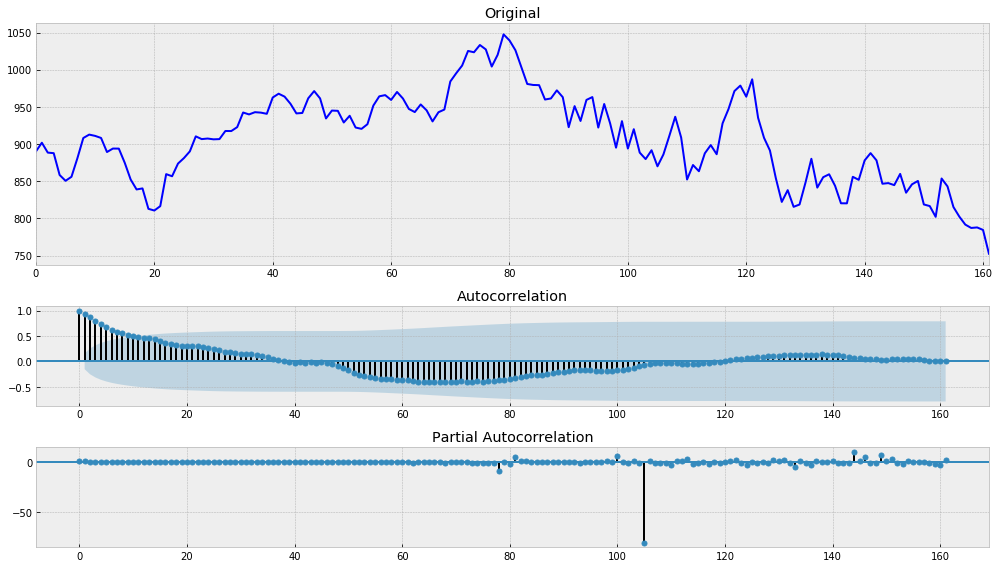

Как мы видим, тест Дики-Фуллера не отвергает гипотезу о нестационарности ряда. 
Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса

Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


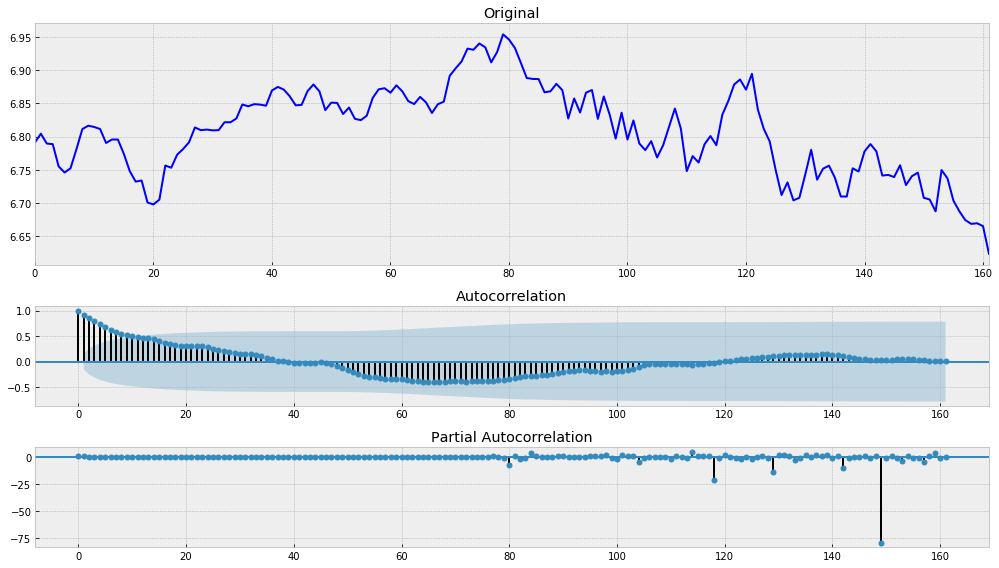

Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. 
По графику ряда видно наличие сильного тренда. 
Уберем его дифференцированием.

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


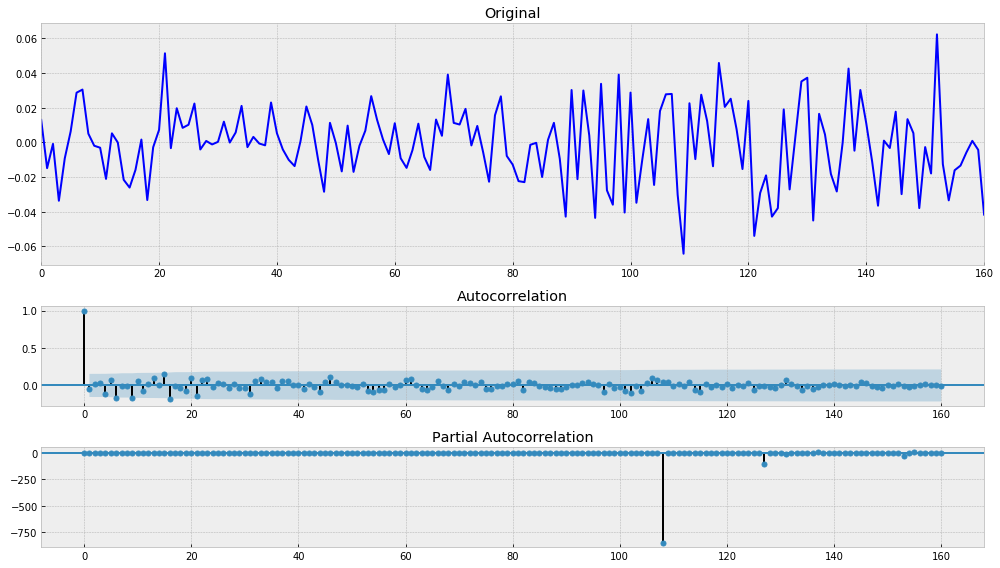

Отлично! С помощью дифференцирования удалось добиться, чтобы тест Дикки-Фуллера отвергал гипотезу о нестационарности ряда!

Filename: monthly-boston-armed-robberies-j.csv



Файл содержит следующие данные:
     Month  Count
0  1966-01     41
1  1966-02     39
2  1966-03     50
3  1966-04     40
4  1966-05     43

Файл содержит следующие столбцы:
Index(['Month', 'Count'], dtype='object')
Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


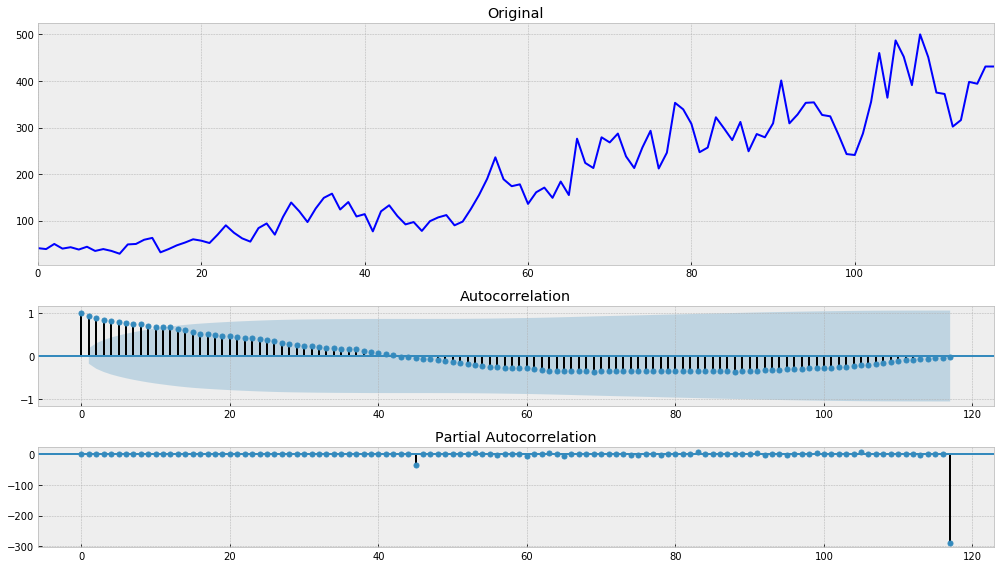

Как мы видим, тест Дики-Фуллера не отвергает гипотезу о нестационарности ряда. 
Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


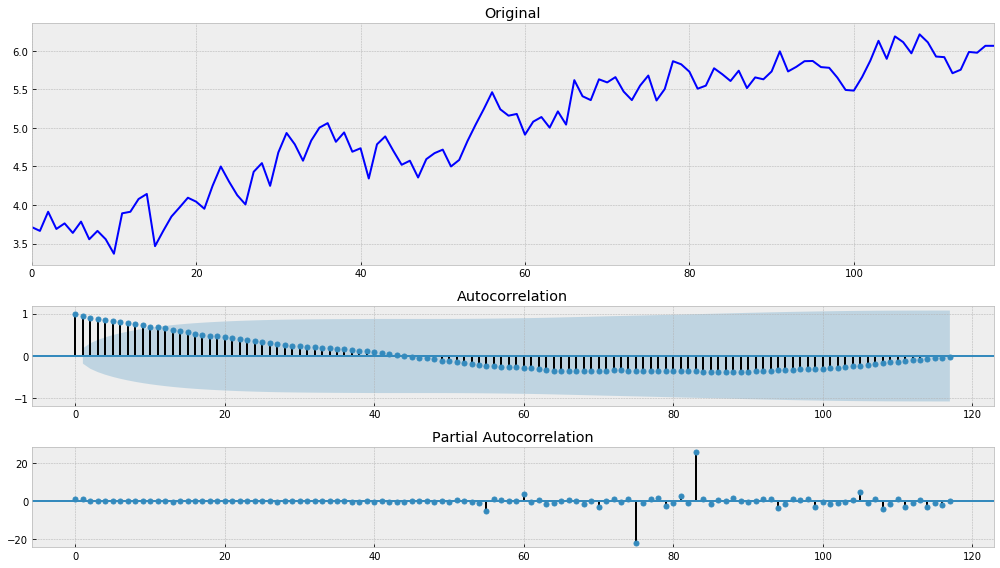

Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. 
По графику ряда видно наличие сильного тренда. 
Уберем его дифференцированием.

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


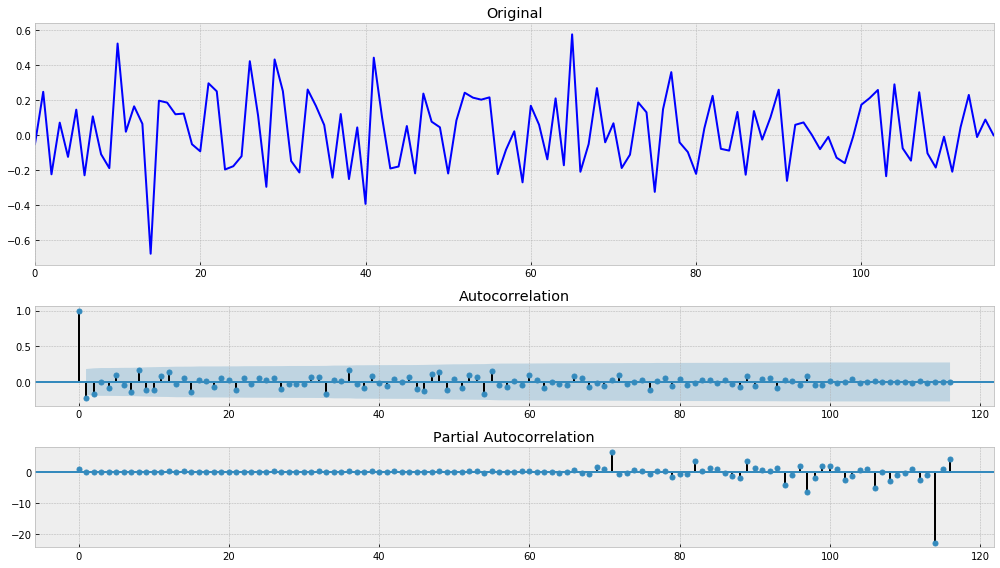

Отлично! С помощью дифференцирования удалось добиться, чтобы тест Дикки-Фуллера отвергал гипотезу о нестационарности ряда!

Filename: international-airline-passengers.csv



Файл содержит следующие данные:
     Month  Count
0  1949-01    112
1  1949-02    118
2  1949-03    132
3  1949-04    129
4  1949-05    121

Файл содержит следующие столбцы:
Index(['Month', 'Count'], dtype='object')
Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


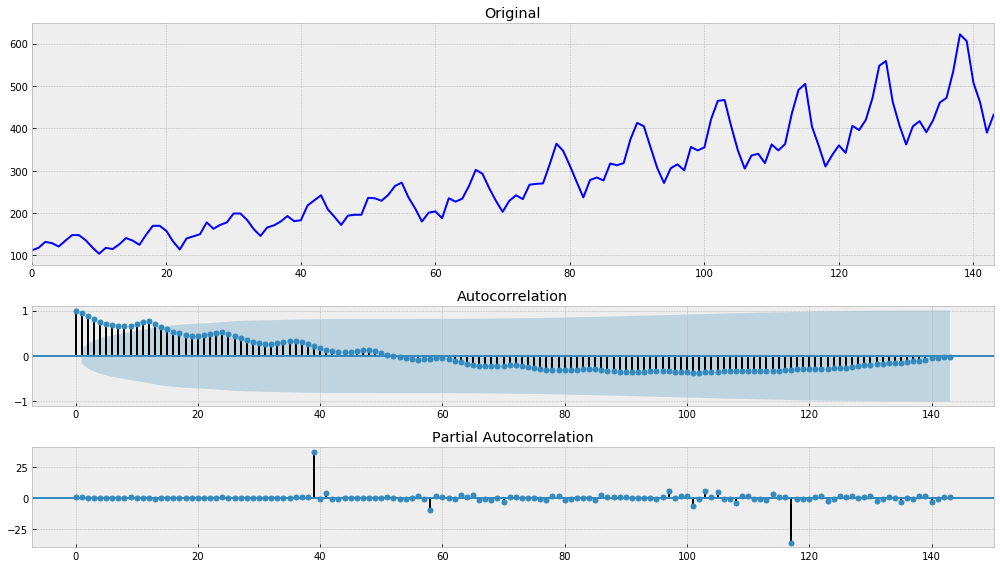

Как мы видим, тест Дики-Фуллера не отвергает гипотезу о нестационарности ряда. 
Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


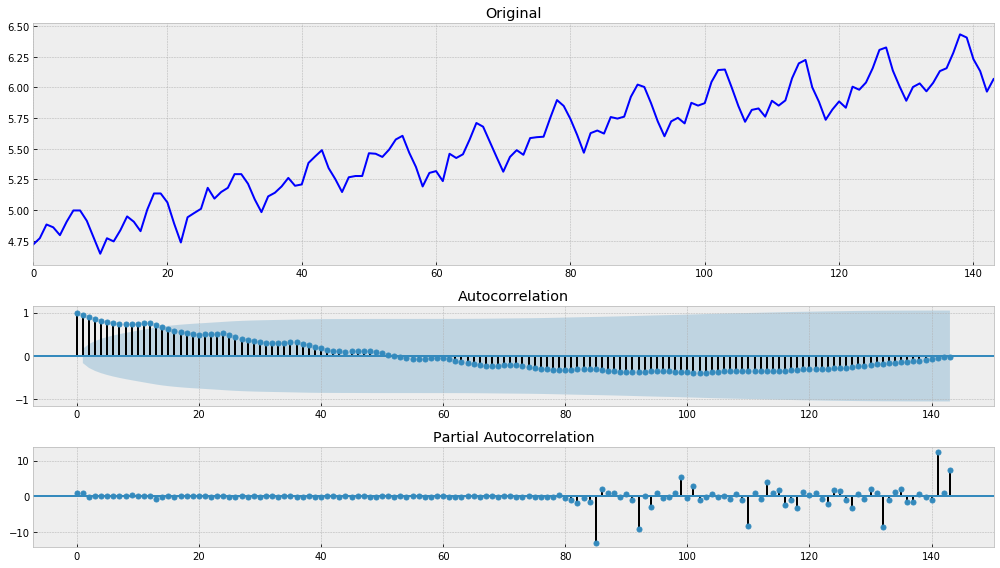

Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. 
По графику ряда видно наличие сильного тренда. 
Уберем его дифференцированием.

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


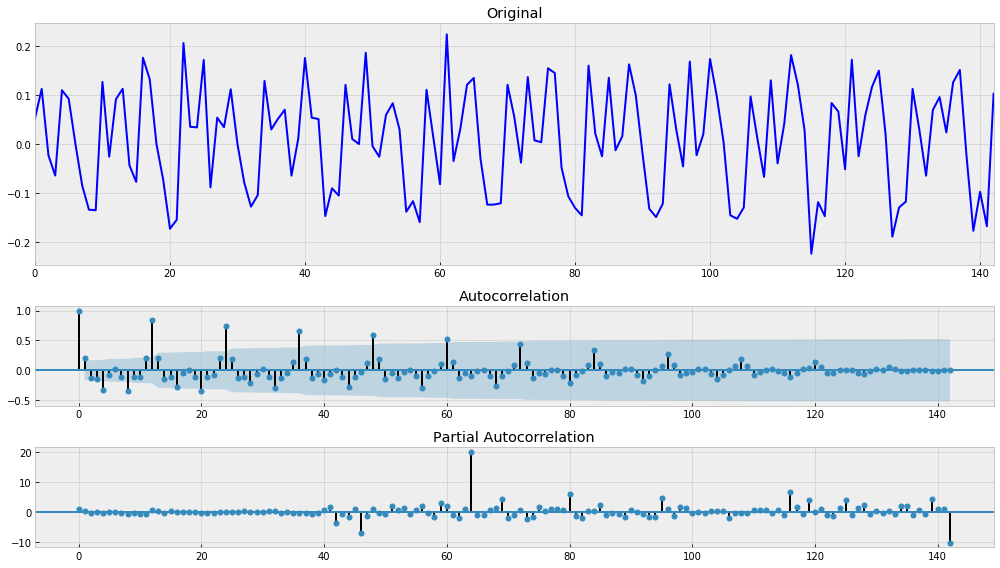

Стало еще лучше, но по графику коррелограммы видно сильное влияние сезонности. 
Уберем ее!

Results of Dickey-Fuller Test:
Test Statistic                  -3.730581
p-value                          0.003703
#Lags Used                      13.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%)            -2.580360
dtype: float64


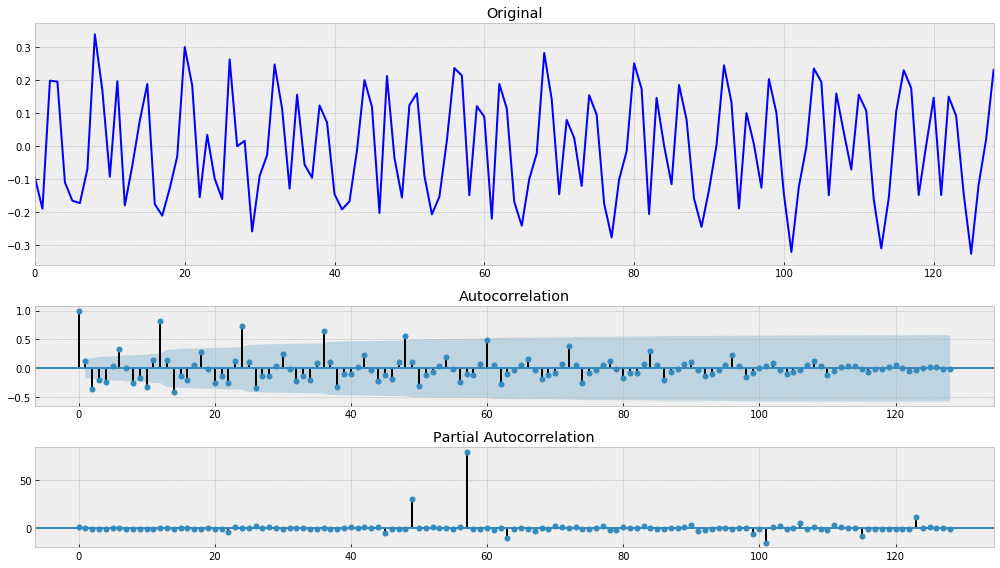

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!



In [3]:
for f in get_list_of_files():
    check_series(f)